In [19]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### read in results

In [138]:
model_cleaning = pd.read_csv('../results/results_cleaning_2D_n100_fitted_to_ts_2023-01-20.csv', header=0)
model_cooking = pd.read_csv('../results/results_tablesetting_cooking_2D_n100_fitted_to_ts_on_2023-01-20.csv')
model_ts = pd.read_csv('../results/results_tablesetting_2D_n100_fitted_to_ts_2023-06-22.csv')

In [114]:
with open ('../../../model_evaluation/neural_net/results/nn_spatialinfo_prequential_summed_fitted_on_ts_results_cleaning_2022-10-11.txt', 'r') as file:
    nn_results_cleaning = ast.literal_eval(file.read())
with open ('../../../model_evaluation/neural_net/results/nn_spatialinfo_prequential_summed_fitted_on_ts_results_cooking_2022-05-10.txt', 'r') as file:
    nn_results_cooking = ast.literal_eval(file.read())
with open ('../../../model_evaluation/neural_net/results/nn_spatialinfo_prequential_summed_fitted_on_ts_results_all_2022-06-07.txt', 'r') as file:
    nn_results_ts = ast.literal_eval(file.read())

In [115]:
with open ('../../../model_evaluation/neural_net/results/pytorch_rnn_prequential_summed_fitted_ts_cleaning_2022-10-11.txt', 'r') as file:
    rnn_results_cleaning = ast.literal_eval(file.read())
with open ('../../../model_evaluation/neural_net/results/pytorch_rnn_prequential_summed_fitted_on_ts_results_cooking_2022-06-09.txt', 'r') as file:
    rnn_results_cooking = ast.literal_eval(file.read())
with open ('../../../model_evaluation/neural_net/results/pytorch_rnn_prequential_summed_fitted_on_ts_all_2022-06-29.txt', 'r') as file:
    rnn_results_ts = ast.literal_eval(file.read())

### check lengths of files

In [139]:
len(model_cooking), len(nn_results_cooking), len(rnn_results_cooking)

(309, 314, 123)

In [140]:
len(model_cleaning), len(nn_results_cleaning), len(rnn_results_cleaning)

(17, 17, 17)

In [141]:
len(model_ts), len(nn_results_ts), len(rnn_results_ts)

(188, 309, 309)

### data wrangling to throw away unnecessary stuff

In [142]:
model_cooking = model_cooking[186:]

In [143]:
len(model_cooking)

123

In [144]:
model_ts = model_ts['c: 1.7; k: 0.2,0.3,1.2; xy'] # lowest error column

In [145]:
model_ts = model_ts[:186] # remove mean + median row

In [146]:
len(model_ts)

186

In [147]:
nn_results_ts = nn_results_ts[:186]

In [148]:
rnn_results_ts = rnn_results_ts[:186]

In [149]:
len(rnn_results_ts), len(nn_results_ts)

(186, 186)

### build dataframes for plotting

In [95]:
model_results_cooking = model_cooking['median'].values

In [97]:
data_cooking = pd.DataFrame()
data_cooking['model'] = model_results_cooking
data_cooking['RNN text prediction'] = rnn_results_cooking
data_cooking['NN w/ spatial info'] = nn_results_cooking

In [150]:
data_ts = pd.DataFrame()
data_ts['model'] = model_ts
data_ts['RNN text prediction'] = rnn_results_ts
data_ts['NN w/ spatial info'] = nn_results_ts

In [98]:
labels = [col for col in data_cooking.columns]

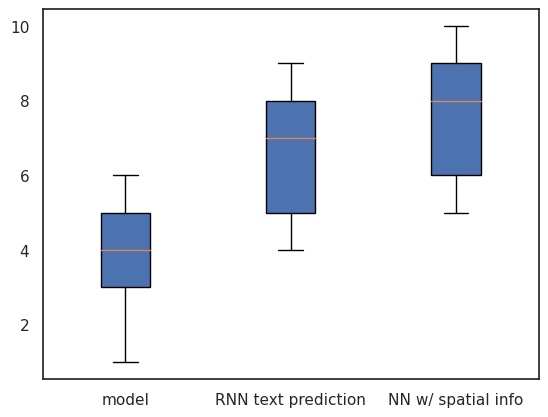

In [100]:
fig = plt.plot(figsize=(12,8))
fig = plt.boxplot(data_cooking, patch_artist=True, labels=labels)

In [44]:
sns.set(style="white")

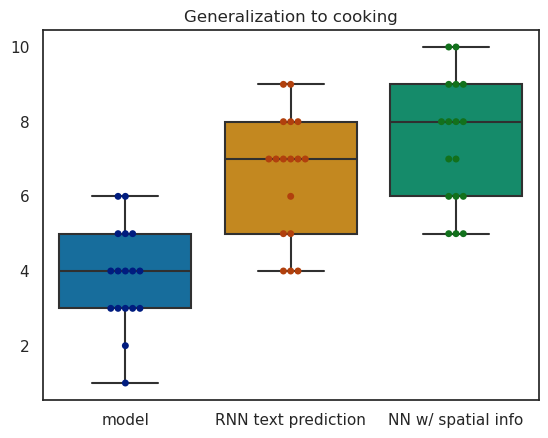

In [101]:
ax = sns.boxplot(data=data_cooking, palette="colorblind").set(title="Generalization to cooking")
ax = sns.swarmplot(data=data_cooking, palette="dark")

Text(0.5, 1.0, 'Generalization to cooking')

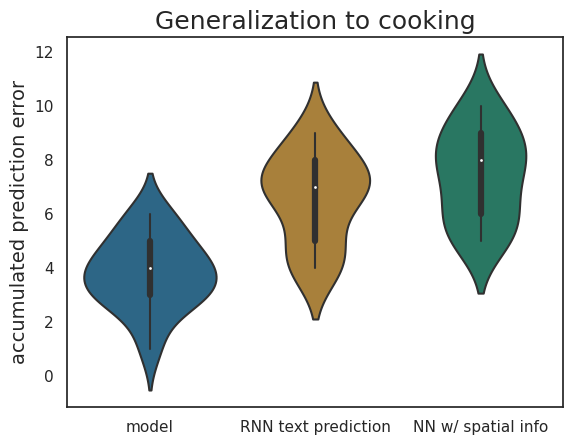

In [102]:
ax = sns.violinplot(data=data_cooking, 
                    palette="colorblind", 
                    saturation=0.5)

plt.ylabel("accumulated prediction error", fontsize=14)
plt.title("Generalization to cooking", fontsize=18)

Text(0.5, 1.0, 'Tablesetting results')

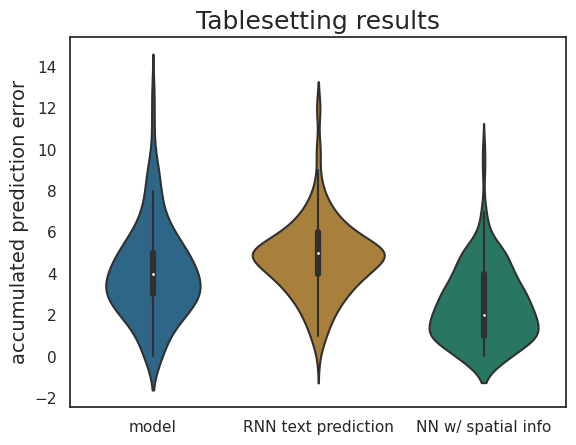

In [152]:
ax = sns.violinplot(data=data_ts, 
                    palette="colorblind", 
                    saturation=0.5)

plt.ylabel("accumulated prediction error", fontsize=14)
plt.title("Tablesetting results", fontsize=18)